In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
def index(ind):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[ind])
    

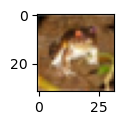

In [5]:
index(0)

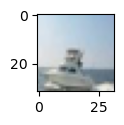

In [6]:
index(100)

In [7]:
y_train[100]

array([8], dtype=uint8)

In [8]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)  # converting a 2D array into a 1D array using numpy
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
classes[y_train[0]]  #will give the names of the classes to which the picture actually belongs

'frog'

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\Kale Ji\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 81ms/step - accuracy: 0.3017 - loss: 1.9369
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 75ms/step - accuracy: 0.4194 - loss: 1.6476
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.4502 - loss: 1.5602
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.4761 - loss: 1.4903
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.4964 - loss: 1.4278


In [18]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4938 - loss: 1.4317


[1.4402519464492798, 0.48919999599456787]

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=model.predict(X_test)
y_pred_class=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1000
           1       0.54      0.68      0.60      1000
           2       0.47      0.19      0.27      1000
           3       0.40      0.29      0.34      1000
           4       0.40      0.45      0.42      1000
           5       0.43      0.34      0.38      1000
           6       0.44      0.70      0.54      1000
           7       0.61      0.48      0.53      1000
           8       0.50      0.73      0.59      1000
           9       0.57      0.49      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [26]:
model_cnn=keras.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #cnn
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [27]:
model_cnn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [28]:
model_cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.3882 - loss: 1.7070
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5711 - loss: 1.2132
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6237 - loss: 1.0836
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6546 - loss: 0.9918
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.6779 - loss: 0.9288
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6950 - loss: 0.8738
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7150 - loss: 0.8194
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7327 - loss: 0.7717
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7482 - loss: 0.7254
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7618 - loss: 0.6826


In [29]:
model_cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6242 - loss: 1.1345


[1.1512826681137085, 0.621999979019165]

In [30]:
y_pred=model_cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.20422803e-02, 1.15182651e-04, 1.08899809e-02, 7.10818589e-01,
        1.03836099e-03, 7.98044354e-02, 1.64747462e-01, 1.68409501e-03,
        1.86540093e-02, 2.05631353e-04],
       [7.09289731e-03, 1.04135670e-01, 1.30493493e-06, 9.47148294e-07,
        9.09439635e-08, 2.27573281e-07, 2.57150305e-07, 8.83697648e-09,
        8.88687491e-01, 8.11513091e-05],
       [4.87045527e-01, 1.22720249e-01, 1.59618650e-02, 3.92589346e-03,
        6.69771573e-03, 1.98160810e-03, 3.90416331e-04, 2.25027418e-03,
        3.20569366e-01, 3.84570248e-02],
       [2.64373124e-01, 4.21556868e-02, 1.01584695e-01, 4.99391463e-03,
        9.42153204e-03, 1.31395456e-04, 3.16099599e-02, 2.75647126e-05,
        5.45627892e-01, 7.42185366e-05],
       [1.04524743e-05, 7.84291624e-05, 4.00618045e-03, 7.30072428e-03,
        1.52564123e-01, 2.67516385e-04, 8.35726500e-01, 9.57758402e-07,
        4.01526631e-05, 4.96517850e-06]], dtype=float32)

In [31]:
y_class=[np.argmax(element) for element in y_pred]
y_class[:15]

[3, 8, 0, 8, 6, 6, 1, 6, 3, 1, 8, 9, 5, 7, 9]

In [32]:
y_test[:15]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1],
       [0],
       [9],
       [5],
       [7],
       [9]], dtype=uint8)

In [33]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1000
           1       0.65      0.85      0.74      1000
           2       0.52      0.48      0.49      1000
           3       0.52      0.36      0.43      1000
           4       0.59      0.54      0.56      1000
           5       0.50      0.59      0.54      1000
           6       0.58      0.83      0.68      1000
           7       0.79      0.60      0.68      1000
           8       0.72      0.76      0.74      1000
           9       0.84      0.50      0.63      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



In [ ]:
#Accuracy of the above code is 62% which is better than the above mentioned code without MaxPooling and CNN neural networks